# extraer datos pelones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df = pd.read_csv('/content/drive/MyDrive/datasets/dataset_final_calidad_aire.csv')
df.head()

,fecha_y_hora,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,prs_mmhg,rainf_mm_h,rh_pct,so2_ppb,sr_kw_m2,tout_ºc,wsr_km_h,wdr_azimutal,__archivo,__hoja
0,2023-01-01 00:00:00,2.37,54.5,32.6,87.1,3.0,110.0,68.00,721.7,0.0,68.0,3.5,0.0,16.39,3.2,257.0,2023-2024.xlsx,SURESTE
1,2023-01-01 01:00:00,2.12,38.7,30.3,68.9,3.0,116.0,67.18,721.5,0.0,72.0,3.4,0.0,15.17,3.3,278.0,2023-2024.xlsx,SURESTE
2,2023-01-01 02:00:00,2.05,38.7,28.8,67.4,3.0,117.0,75.12,721.1,0.0,71.0,3.6,0.0,14.82,3.7,278.0,2023-2024.xlsx,SURESTE
3,2023-01-01 03:00:00,2.50,60.5,29.1,89.4,3.0,135.0,82.81,720.8,0.0,68.0,3.8,0.0,15.51,3.6,197.0,2023-2024.xlsx,SURESTE
4,2023-01-01 04:00:00,1.94,42.3,25.7,67.7,24.0,132.0,59.56,720.7,0.0,73.0,3.6,0.0,13.81,4.9,271.0,2023-2024.xlsx,SURESTE


In [13]:
df.columns

Index(['fecha_y_hora', 'co_ppm', 'no_ppb', 'no2_ppb', 'nox_ppb', 'o3_ppb',
       'pm10_ug_m3', 'pm2_5_ug_m3', 'prs_mmhg', 'rainf_mm_h', 'rh_pct',
       'so2_ppb', 'sr_kw_m2', 'tout_ºc', 'wsr_km_h', 'wdr_azimutal',
       '__archivo', '__hoja'],
      dtype='object')

In [16]:
data = df[['fecha_y_hora', 'co_ppm', 'no_ppb', 'no2_ppb', 'nox_ppb', 'o3_ppb',
       'pm10_ug_m3', 'pm2_5_ug_m3', 'so2_ppb', '__hoja']]
data.head()

,fecha_y_hora,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb,__hoja
0,2023-01-01 00:00:00,2.37,54.5,32.6,87.1,3.0,110.0,68.00,3.5,SURESTE
1,2023-01-01 01:00:00,2.12,38.7,30.3,68.9,3.0,116.0,67.18,3.4,SURESTE
2,2023-01-01 02:00:00,2.05,38.7,28.8,67.4,3.0,117.0,75.12,3.6,SURESTE
3,2023-01-01 03:00:00,2.50,60.5,29.1,89.4,3.0,135.0,82.81,3.8,SURESTE
4,2023-01-01 04:00:00,1.94,42.3,25.7,67.7,24.0,132.0,59.56,3.6,SURESTE


In [17]:
data = data.rename(columns={'fecha_y_hora': 'fecha_hora', '__hoja': 'estacion'})
data.head()

,fecha_hora,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb,estacion
0,2023-01-01 00:00:00,2.37,54.5,32.6,87.1,3.0,110.0,68.00,3.5,SURESTE
1,2023-01-01 01:00:00,2.12,38.7,30.3,68.9,3.0,116.0,67.18,3.4,SURESTE
2,2023-01-01 02:00:00,2.05,38.7,28.8,67.4,3.0,117.0,75.12,3.6,SURESTE
3,2023-01-01 03:00:00,2.50,60.5,29.1,89.4,3.0,135.0,82.81,3.8,SURESTE
4,2023-01-01 04:00:00,1.94,42.3,25.7,67.7,24.0,132.0,59.56,3.6,SURESTE


In [19]:
data['fecha_hora'] = pd.to_datetime(data['fecha_hora'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226529 entries, 0 to 226528
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   fecha_hora   226529 non-null  datetime64[ns]
 1   co_ppm       226529 non-null  float64       
 2   no_ppb       226529 non-null  float64       
 3   no2_ppb      226529 non-null  float64       
 4   nox_ppb      226529 non-null  float64       
 5   o3_ppb       226529 non-null  float64       
 6   pm10_ug_m3   226529 non-null  float64       
 7   pm2_5_ug_m3  226529 non-null  float64       
 8   so2_ppb      226529 non-null  float64       
 9   estacion     226529 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 17.3+ MB


## Agrupar por día para hacer clustering y densogramas más simples

In [26]:
# Agrupar por estación y por día
df_clustering = (
    data
    .assign(fecha=data['fecha_hora'].dt.date)
    .groupby(['estacion', 'fecha'], as_index=False)
    .mean(numeric_only=True)
)
df_clustering['fecha'] = pd.to_datetime(df_clustering['fecha'])

df_clustering.head()


,estacion,fecha,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,CENTRO,2023-01-01,1.262500,5.195833,18.633333,24.025000,29.083333,66.416667,36.005833,6.141667
1,CENTRO,2023-01-02,1.488750,18.062500,29.491667,47.766667,16.000000,79.458333,27.028750,5.345833
2,CENTRO,2023-01-03,1.203333,15.258333,28.137500,43.595833,18.625000,91.250000,17.366250,7.595833
3,CENTRO,2023-01-04,1.228333,13.420833,28.729167,42.358333,25.208333,83.375000,20.537917,8.495833
4,CENTRO,2023-01-05,1.298750,12.566667,30.558333,43.120833,25.958333,95.666667,16.791667,6.083333


## Clustering por estación

In [27]:
data_numeric = df_clustering.drop('fecha', axis=1).select_dtypes(include=np.number)
data_numeric.head()

,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,1.262500,5.195833,18.633333,24.025000,29.083333,66.416667,36.005833,6.141667
1,1.488750,18.062500,29.491667,47.766667,16.000000,79.458333,27.028750,5.345833
2,1.203333,15.258333,28.137500,43.595833,18.625000,91.250000,17.366250,7.595833
3,1.228333,13.420833,28.729167,42.358333,25.208333,83.375000,20.537917,8.495833
4,1.298750,12.566667,30.558333,43.120833,25.958333,95.666667,16.791667,6.083333


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

unique_stations = df_clustering['estacion'].unique()
station_cluster_labels = {}
optimal_clusters = {}

for station in unique_stations:
    print(f"Processing station: {station}")
    station_data = data_numeric[df_clustering['estacion'] == station]

    # Determine optimal number of clusters using silhouette score with K-means
    silhouette_scores = []
    k_range = range(2, min(11, station_data.shape[0])) # Ensure k is less than number of samples

    if len(k_range) > 0:
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            kmeans.fit(station_data)
            score = silhouette_score(station_data, kmeans.labels_)
            silhouette_scores.append(score)

        optimal_k = k_range[np.argmax(silhouette_scores)]
        optimal_clusters[station] = optimal_k
        print(f"Optimal number of clusters for {station}: {optimal_k}")

        # Perform K-means clustering (as an approximation for PAM)
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        station_cluster_labels[station] = kmeans.fit_predict(station_data)
    else:
        print(f"Not enough data points to perform clustering for station: {station}")
        optimal_clusters[station] = None
        station_cluster_labels[station] = None


Processing station: CENTRO
Optimal number of clusters for CENTRO: 2
Processing station: NORESTE
Optimal number of clusters for NORESTE: 2
Processing station: NORESTE2
Optimal number of clusters for NORESTE2: 2
Processing station: NOROESTE
Optimal number of clusters for NOROESTE: 2
Processing station: NORTE
Optimal number of clusters for NORTE: 2
Processing station: NORTE2
Optimal number of clusters for NORTE2: 2
Processing station: SUR
Optimal number of clusters for SUR: 2
Processing station: SURESTE
Optimal number of clusters for SURESTE: 2
Processing station: SUROESTE
Optimal number of clusters for SUROESTE: 2
Processing station: SUROESTE2
Optimal number of clusters for SUROESTE2: 2


## Graficar clusters

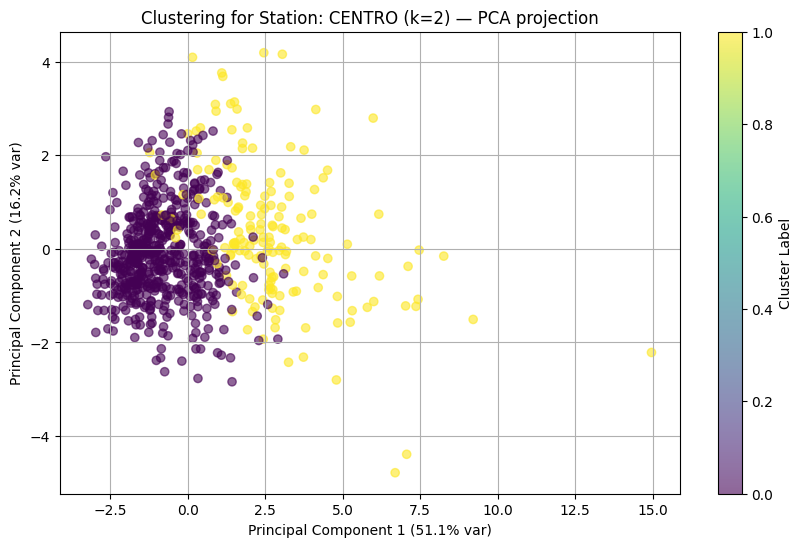

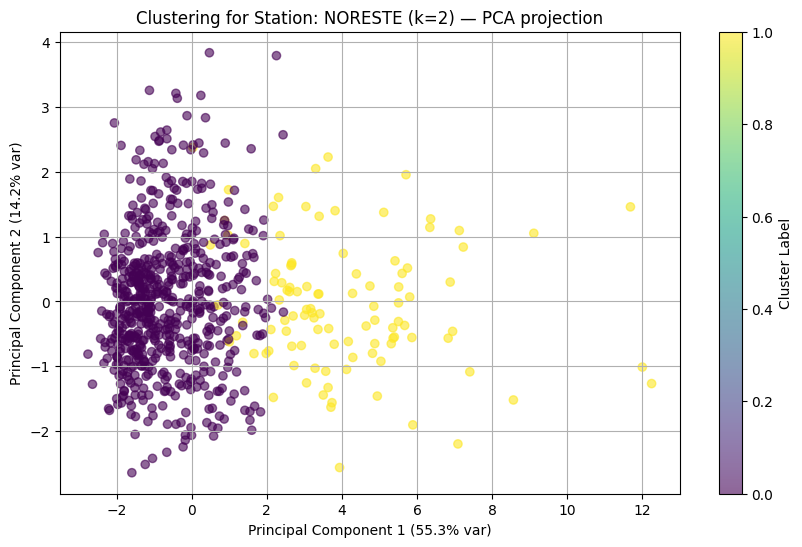

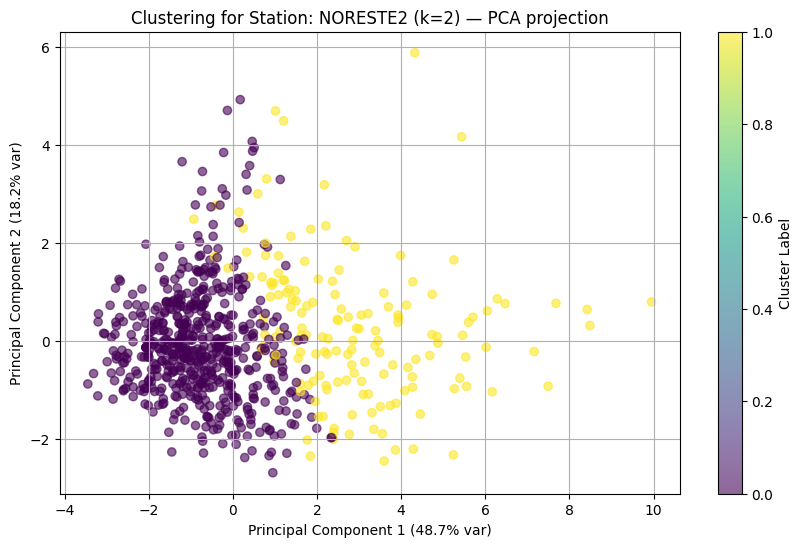

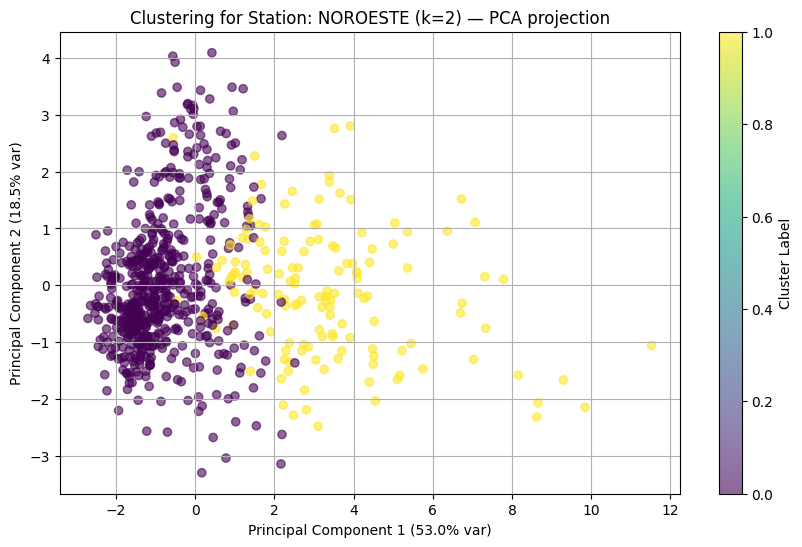

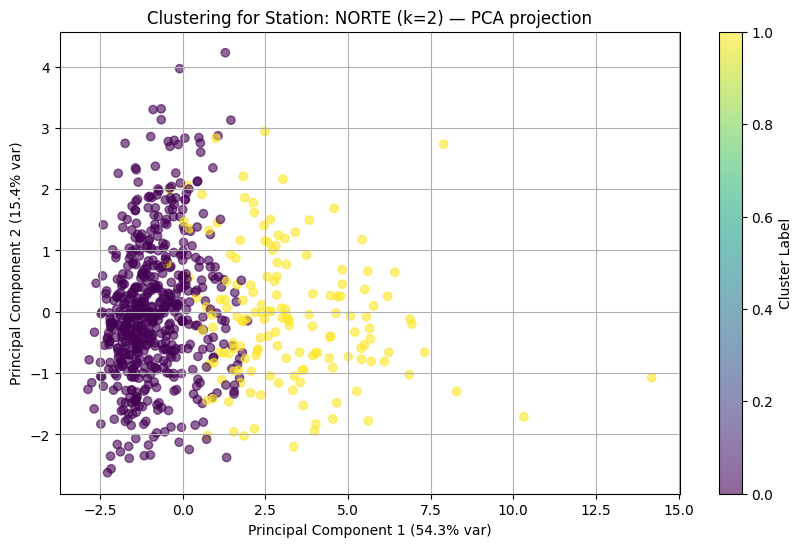

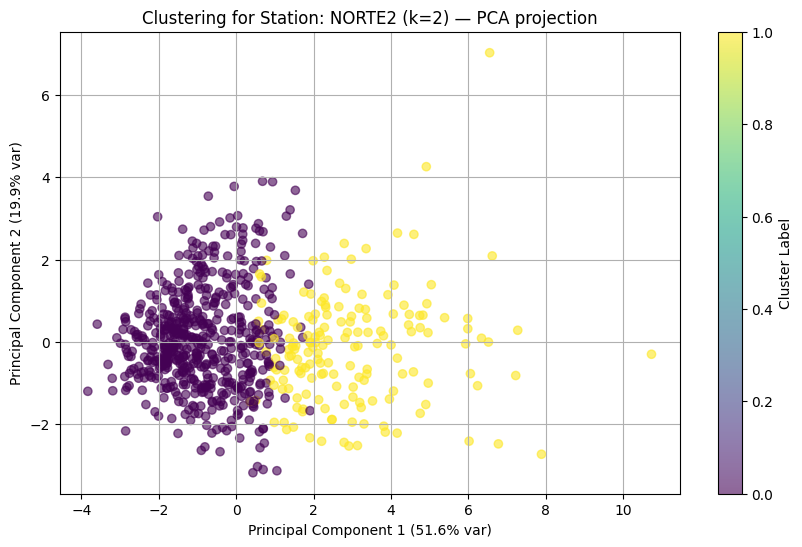

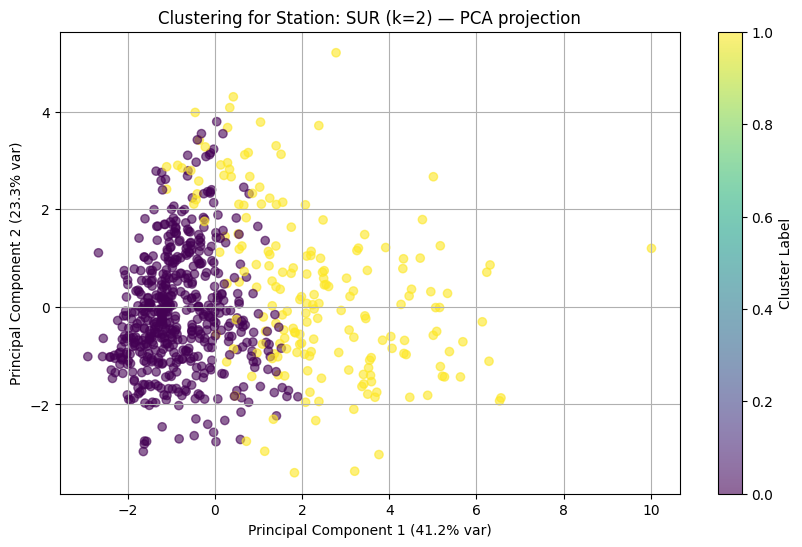

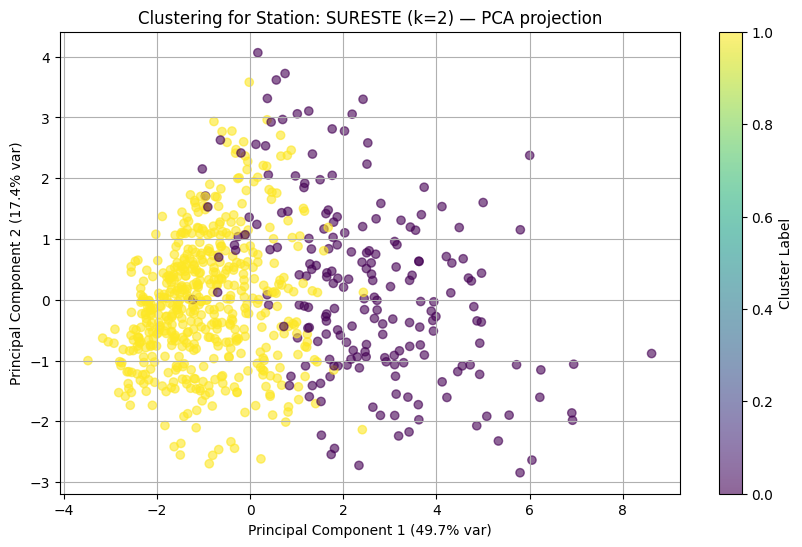

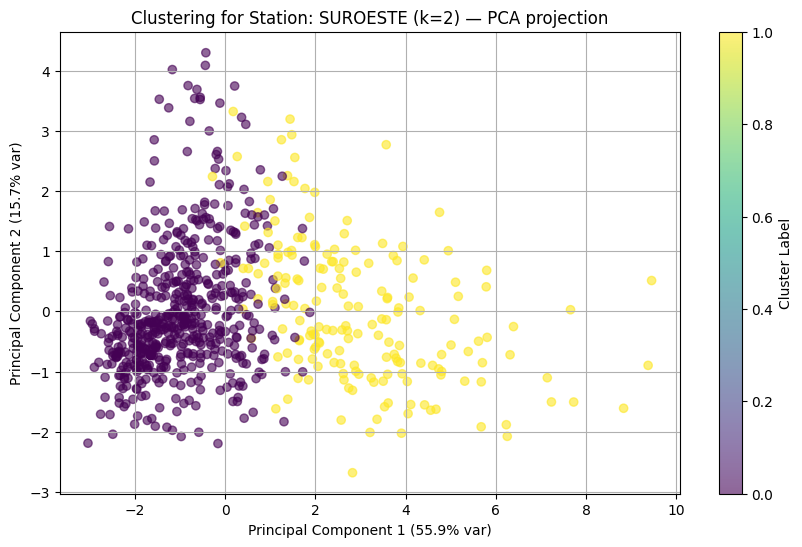

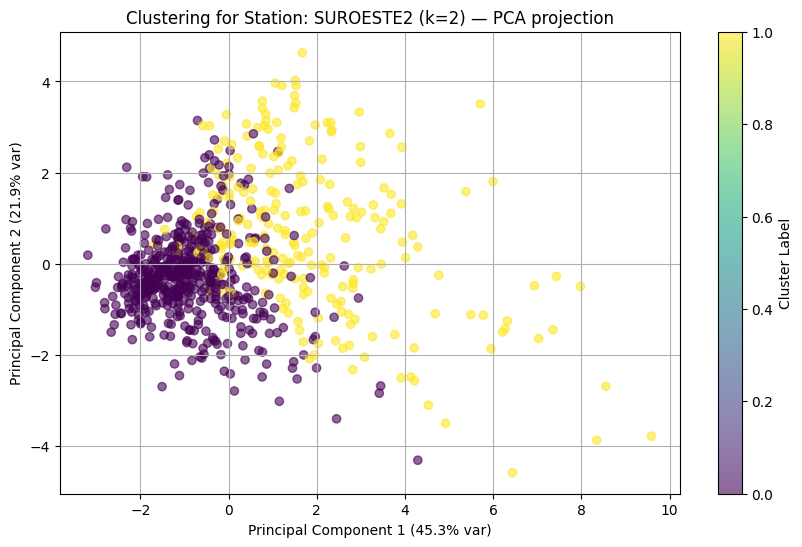

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

for station, optimal_k in optimal_clusters.items():
    if optimal_k is not None:

        # Filtrar datos por estación
        station_data_full = df_clustering[df_clustering['estacion'] == station]
        station_data_numeric = data_numeric[df_clustering['estacion'] == station]
        cluster_labels = station_cluster_labels[station]

        # Asegurarse de que haya datos numéricos suficientes
        if station_data_numeric.shape[1] >= 2:
            pca = PCA(n_components=2)
            station_data_numeric_scaled = StandardScaler().fit_transform(station_data_numeric)
            pca_result = pca.fit_transform(station_data_numeric_scaled)

            # Crear DataFrame con las dos primeras componentes principales
            pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

            # Graficar los clusters en el espacio PCA
            plt.figure(figsize=(10, 6))
            scatter = plt.scatter(
                pca_df['PC1'], pca_df['PC2'],
                c=cluster_labels, cmap='viridis', alpha=0.6
            )
            plt.title(f'Clustering for Station: {station} (k={optimal_k}) — PCA projection')
            plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)')
            plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)')
            plt.colorbar(scatter, label='Cluster Label')
            plt.grid(True)
            plt.show()
        else:
            print(f"Not enough numerical columns to perform PCA for station: {station}")



## Centroide de clusters por estación

In [37]:
from pickle import TRUE
cluster_summary = {}

for station, labels in station_cluster_labels.items():
    if labels is not None:
        station_data_full = df_clustering[df_clustering['estacion'] == station].copy()
        station_data_full['cluster'] = labels

        # Media y desviación estándar
        summary = station_data_full.groupby(['estacion','cluster']).agg(['mean', 'std']).stack(future_stack=True)
        cluster_summary[station] = summary.drop('fecha', axis=1).reset_index().rename(columns={'level_2': 'statistic'})

# Mostrar resultados
for station, summary_df in cluster_summary.items():
    display(summary_df)
    print("\n")

,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,CENTRO,0,mean,1.382798,6.308262,14.151723,20.532244,29.849251,51.881291,19.093676,3.557124
1,CENTRO,0,std,0.755320,3.440482,4.840939,7.418405,9.527670,12.579829,7.192929,1.053727
2,CENTRO,1,mean,1.985011,17.166161,25.782150,43.023447,29.300666,91.555604,33.756101,5.020870
3,CENTRO,1,std,0.647758,14.624747,7.463523,19.498039,10.486187,22.017411,12.678496,1.742294


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,NORESTE,0,mean,1.579165,8.328441,13.068309,21.432637,28.342362,53.484942,17.957904,3.746704
1,NORESTE,0,std,0.993336,4.549829,4.537943,7.912231,7.777089,17.585076,7.374638,1.172829
2,NORESTE,1,mean,2.791755,32.571274,26.921434,59.524840,25.137019,122.269700,36.439603,5.123678
3,NORESTE,1,std,1.392033,17.560675,6.574733,21.676327,6.198441,33.641716,21.689159,1.288254


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,NORESTE2,0,mean,1.688571,12.506451,17.383471,29.905155,24.067593,59.742042,19.500326,4.051324
1,NORESTE2,0,std,0.946062,5.865791,4.989425,9.517793,8.925142,16.602735,5.984709,1.724831
2,NORESTE2,1,mean,2.264629,30.398237,28.754033,59.156864,22.970085,115.472222,29.185764,5.345726
3,NORESTE2,1,std,0.851345,15.335713,7.054164,20.515632,5.196296,27.436234,10.420821,1.826665


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,NOROESTE,0,mean,1.364131,6.126747,13.074115,19.201089,28.673132,40.449260,17.504644,3.987702
1,NOROESTE,0,std,0.541713,3.525798,5.039526,7.578459,8.750255,14.481765,3.151924,1.238808
2,NOROESTE,1,mean,1.835041,23.417488,25.103521,48.518574,25.926350,86.248239,27.719484,5.447946
3,NOROESTE,1,std,0.478531,11.946831,8.033125,17.504831,6.863857,25.085057,11.895257,1.353429


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,NORTE,0,mean,0.620198,6.428404,12.232315,18.689634,27.196514,51.257336,13.974475,3.131179
1,NORTE,0,std,0.211298,4.909738,5.443732,9.623642,8.232609,18.118137,6.289305,0.987773
2,NORTE,1,mean,1.005918,31.365021,24.671975,56.045993,24.470541,107.559912,23.463487,3.583639
3,NORTE,1,std,0.334351,17.033730,6.946063,22.319327,6.856894,29.697295,8.462442,1.197579


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,NORTE2,0,mean,1.173925,15.243502,21.413217,36.657994,26.620180,53.523220,18.899316,3.782905
1,NORTE2,0,std,0.396988,8.845997,6.439709,13.580314,8.381003,17.141623,7.475961,0.937466
2,NORTE2,1,mean,1.654081,43.803456,37.636544,81.429730,22.037990,103.416176,26.664216,4.625245
3,NORTE2,1,std,0.459173,18.706042,7.586931,22.556370,7.082315,29.795510,10.405191,1.190329


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,SUR,0,mean,0.851501,5.268398,12.686657,17.799556,29.222108,42.321541,15.478539,2.710329
1,SUR,0,std,0.384180,2.285002,5.011607,6.553847,9.236731,11.991450,5.092514,0.743090
2,SUR,1,mean,1.211158,10.743040,29.934533,40.566587,26.110559,66.585951,20.820690,3.095956
3,SUR,1,std,0.429809,6.136760,13.555431,15.860938,11.276234,22.288993,6.728673,0.697292


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,SURESTE,0,mean,1.788880,21.716852,20.542946,42.185850,28.148515,77.613061,21.774524,4.273391
1,SURESTE,0,std,0.764041,13.106690,6.373444,17.171687,9.705924,22.264633,7.014340,1.194636
2,SURESTE,1,mean,1.201567,6.995868,11.376098,18.297565,27.705476,40.303605,14.899703,3.021047
3,SURESTE,1,std,0.649354,4.539281,4.461357,8.122637,8.245881,13.400136,4.621963,0.875753


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,SUROESTE,0,mean,1.353231,7.663995,15.024368,22.564525,28.728924,52.789030,20.812004,5.255314
1,SUROESTE,0,std,0.736731,4.821654,4.537670,8.502780,10.911436,18.810940,7.407551,1.717619
2,SUROESTE,1,mean,2.185048,34.453457,28.216690,62.588828,27.370192,107.521184,37.936328,6.468315
3,SUROESTE,1,std,0.559444,18.201146,7.119119,23.749896,10.005302,25.994696,13.855598,1.941439


,estacion,cluster,statistic,co_ppm,no_ppb,no2_ppb,nox_ppb,o3_ppb,pm10_ug_m3,pm2_5_ug_m3,so2_ppb
0,SUROESTE2,0,mean,0.996892,6.610699,14.861701,21.470536,27.939656,48.096465,15.370065,3.582479
1,SUROESTE2,0,std,0.753741,4.691103,4.690225,8.096106,10.559430,11.675638,4.015720,0.970366
2,SUROESTE2,1,mean,1.899519,11.108488,21.883557,32.987012,30.606815,89.222596,25.481101,4.558555
3,SUROESTE2,1,std,1.071237,9.976049,7.707530,15.962619,12.580706,24.262871,7.495154,1.578078


## Dendogramas

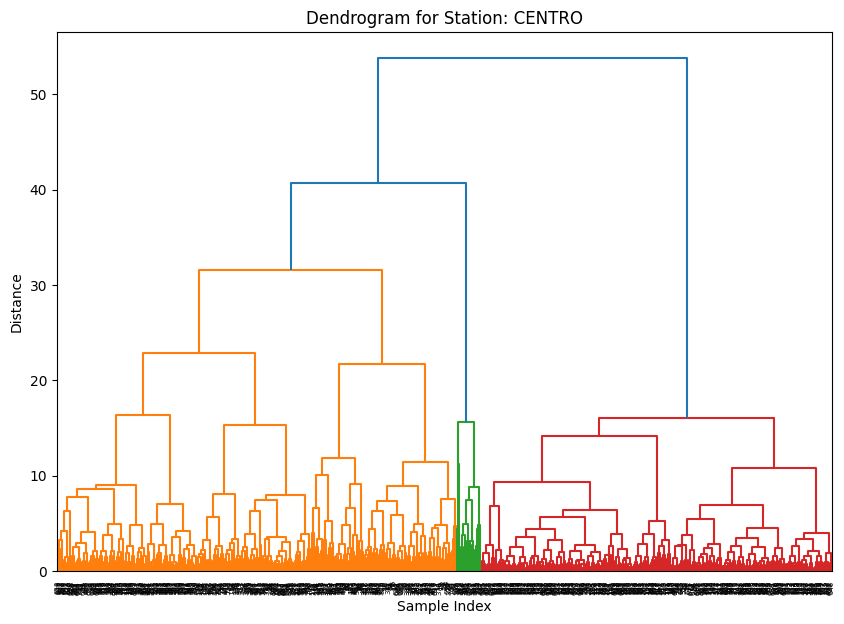

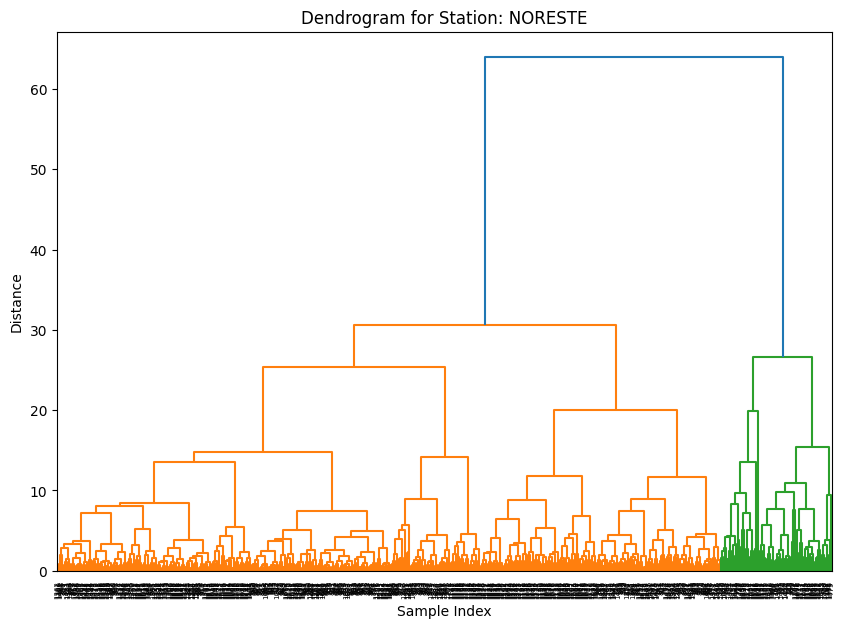

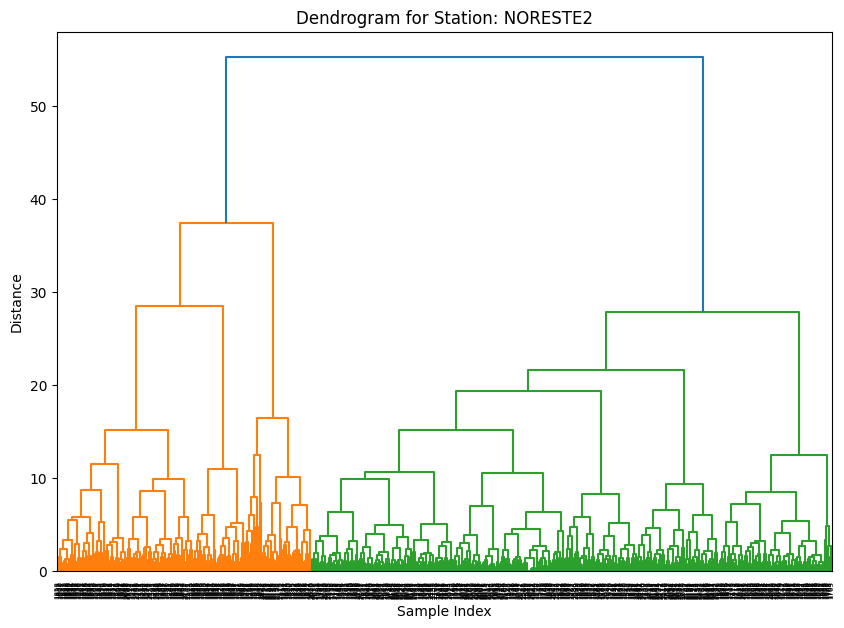

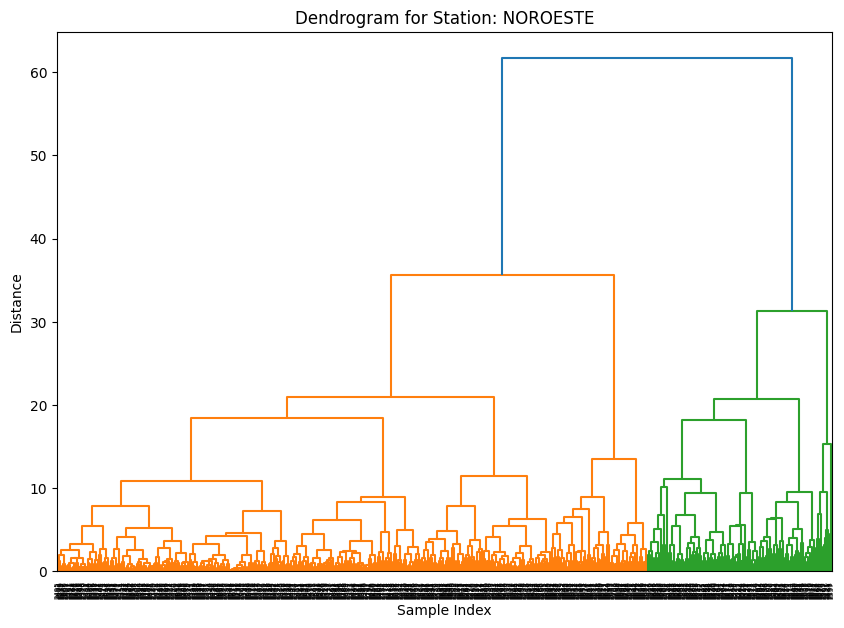

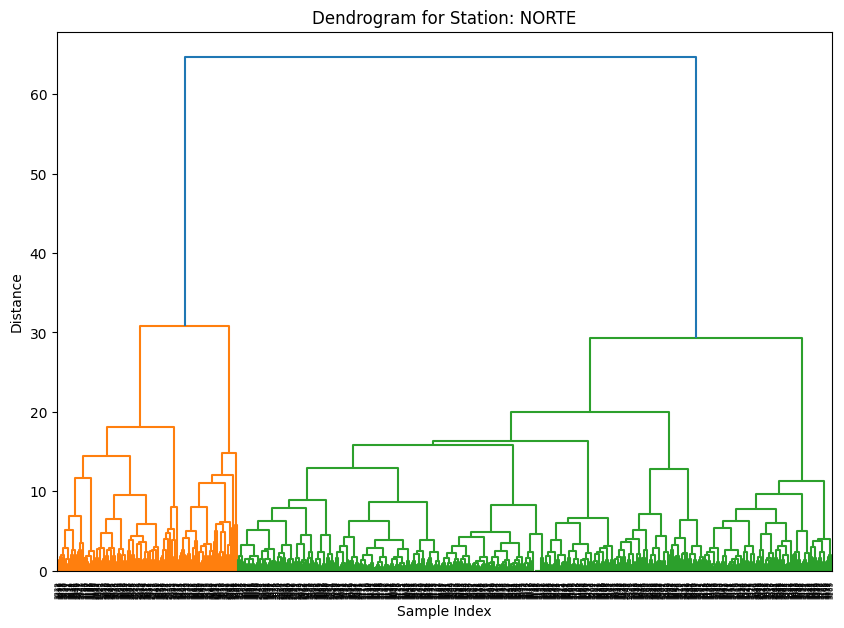

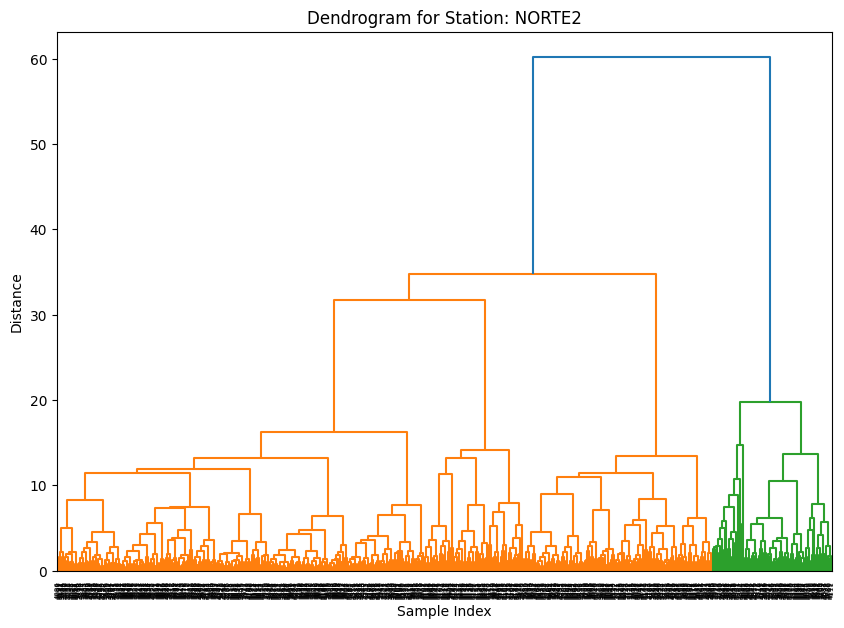

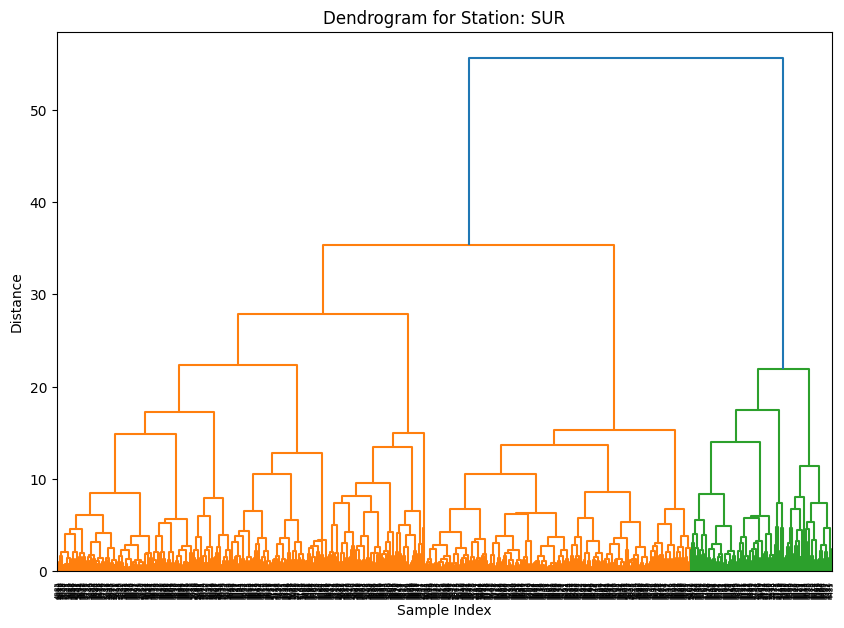

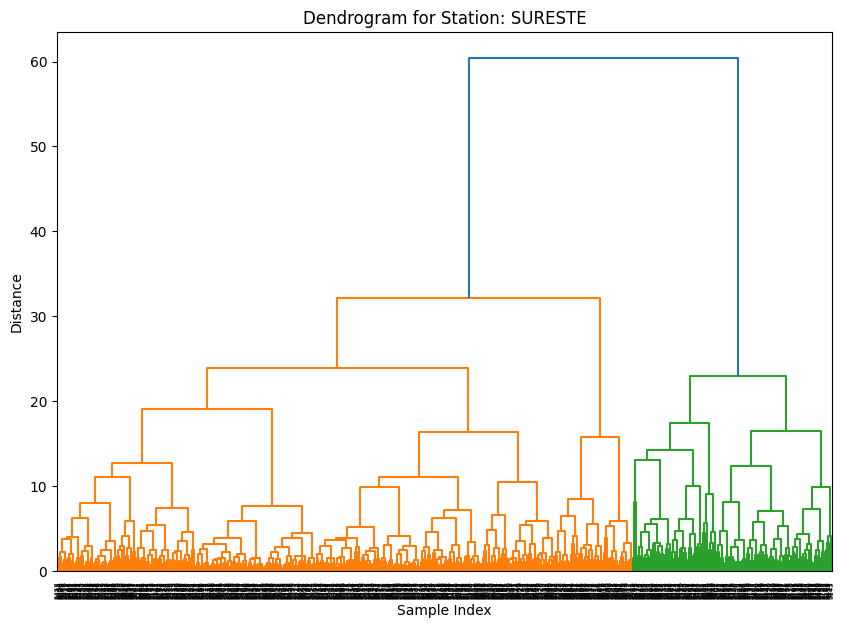

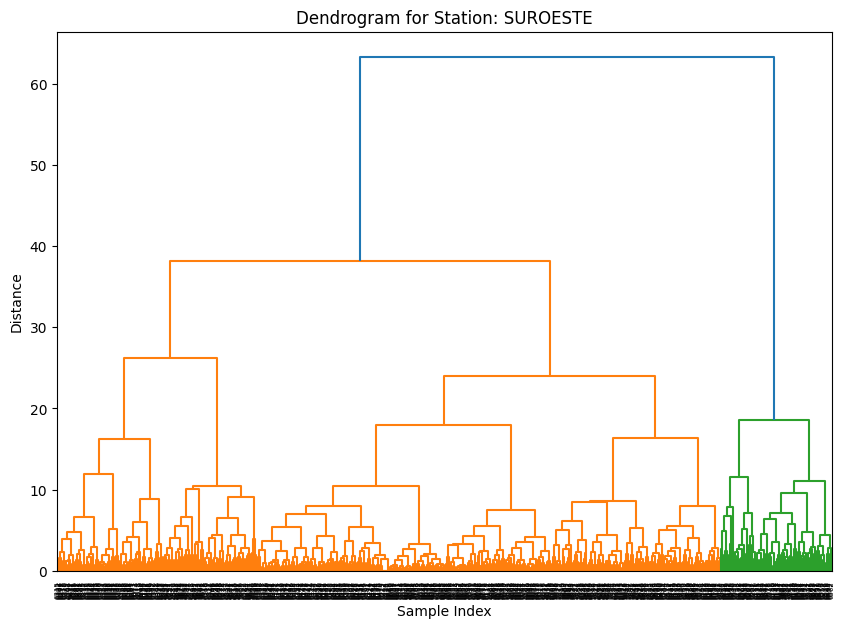

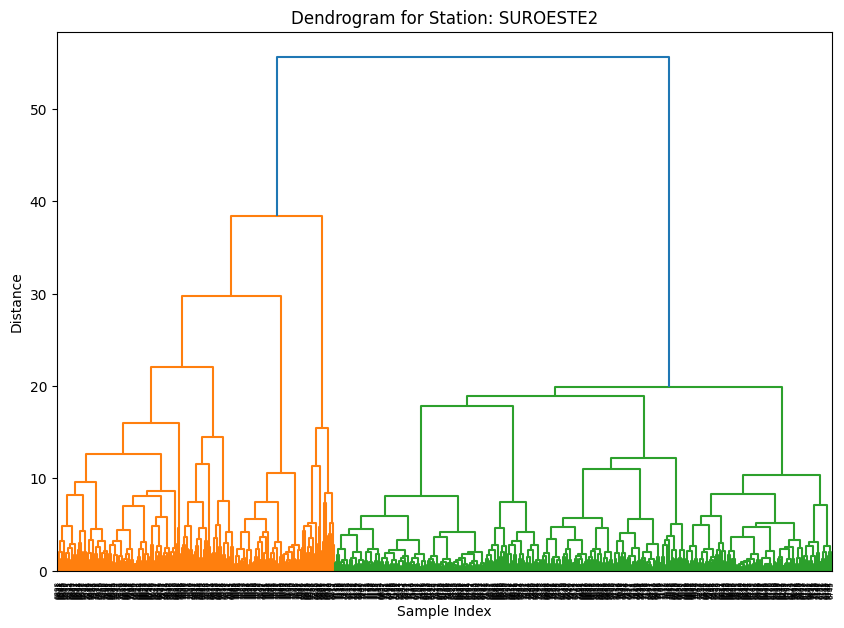

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

for station in df_clustering['estacion'].unique():
    station_data = df_clustering[df_clustering['estacion'] == station].drop(['estacion', 'fecha'], axis=1)
    scaler = StandardScaler()
    station_data_scaled = scaler.fit_transform(station_data)

    # Matriz de distancias
    linked = linkage(station_data_scaled, 'ward')

    # Graficar dendograma
    plt.figure(figsize=(10, 7))
    dendrogram(linked,
               orientation='top',
               labels=station_data.index.tolist(),
               distance_sort='descending',
               show_leaf_counts=True)
    plt.title(f'Dendrogram for Station: {station}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()